In [ ]:
# LDA Analysis: Analysis of LDA Topics

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
all_data = pd.DataFrame()
for city in ['nyc', 'london', 'la']:
    file = '../../Data/data_'+city+'.csv'
    data = pd.read_csv(file)
    print(len(data))
    data = data[data['disadvantaged']==True]
    print(len(data))
    data = data[data['count_listings']>=5]
    print(len(data))
    print()
    
    if city=='london':
        data['nb'] = data['ward']
    else:
        data['nb'] = data['zipcode']
        
    if city == 'london':
        data['lda_checkin'] = data['lda_5']
        data['lda_listings'] = data['lda_2']
        data['lda_stayhost'] = data['lda_4']
        data['lda_location'] = data['lda_3']
        data['lda_transport'] = data['lda_1']
    if city == 'nyc':
        data['lda_checkin'] = data['lda_1']
        data['lda_listings'] = data['lda_2']
        data['lda_stayhost'] = data['lda_3']
        data['lda_location'] = data['lda_4']
        data['lda_transport'] = data['lda_5']
    if city == 'la':
        data['lda_checkin'] = data['lda_2']
        data['lda_listings'] = data['lda_3']
        data['lda_stayhost'] = data['lda_5']
        data['lda_location'] = data['lda_1']

    # Percentile of Index 
    for p in ['index_change']:
        perc = []
        curr = data[pd.notna(data[p])]

        for i,r in data.iterrows():
            if pd.notna(r[p]):
                perc.append(stats.percentileofscore(curr[p], r[p]))
            else:
                perc.append(np.nan)
        data[p+'_perc'] = perc
    all_data = pd.concat([all_data, data])

185
83
79

454
230
186

130
68
58



In [3]:
data = all_data

In [18]:
g = data[data['index_change_perc']>=75]
ng = data[data['index_change_perc']<=25]

In [19]:
lda = ['lda_checkin', 'lda_listings', 'lda_stayhost', 'lda_location', 'lda_transport']

In [20]:
for l in lda:
    print(l, stats.ttest_ind(g[l], ng[l]))

lda_checkin Ttest_indResult(statistic=-0.7974684281188978, pvalue=0.4263609238156585)
lda_listings Ttest_indResult(statistic=-0.3354757647535641, pvalue=0.7377056907089525)
lda_stayhost Ttest_indResult(statistic=-3.65077537181839, pvalue=0.000353660326696667)
lda_location Ttest_indResult(statistic=6.957876646400915, pvalue=8.385056698621353e-11)
lda_transport Ttest_indResult(statistic=nan, pvalue=nan)


In [21]:
g_save = []
ng_save = []
for l in lda:
    g_save.append(np.nanmean(g[l]))
    ng_save.append(np.nanmean(ng[l]))

In [22]:
g_new = []
ng_new = []
for i in range(len(g_save)):
    g_new.append(g_save[i]/np.sum(g_save))
    ng_new.append(ng_save[i]/np.sum(ng_save))

In [23]:
g_new,ng_new

([0.12168717189078206,
  0.20531551267199563,
  0.3636301730379481,
  0.14644575222975648,
  0.16292139016951762],
 [0.1259672581435257,
  0.20598375574513433,
  0.41452980002801265,
  0.09788363444777494,
  0.15563555163555234])

# Plot Results

In [24]:
from matplotlib import pyplot as plt

import matplotlib.patches

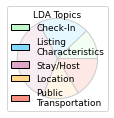

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 720x288 with 0 Axes>

In [29]:
# Legend

plt.rcParams["figure.figsize"] = [10,4]

colors = ['#bff8c9', '#83d8ff', '#dda5c6', '#ffd689', '#fb9185']

fig1, ax1 = plt.subplots()
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

wedge={"edgecolor":"k",'linewidth': 1}

ax1.pie(g_new, colors=colors, wedgeprops=wedge)


fig1.set_size_inches(1.8,1.8)

lda = ['Check-In', 'Listing\nCharacteristics', 'Stay/Host', 'Location', 'Public\nTransportation']
plt.rcParams['legend.title_fontsize'] = 9
plt.legend(loc='center', title='LDA Topics', labels=lda, fontsize=9)
#plt.title('Gentrification Score:\nUpper Quartile')
plt.show()

plt.tight_layout()
plt.draw()


fig1.savefig('pie_legend.eps', format='eps', dpi=1000)

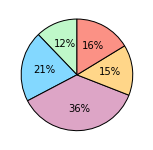

<Figure size 720x720 with 0 Axes>

In [31]:
# Pie Chart

plt.rcParams["figure.figsize"] = [10,10]

colors = ['#bff8c9', '#83d8ff', '#dda5c6', '#ffd689', '#fb9185']
#colors = ['#83d8ff']
fig1, ax1 = plt.subplots()
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

wedge={"edgecolor":"k",'linewidth': 1}

slices, labels, junk = ax1.pie(g_new, labels=None, autopct='%1.0f%%', startangle=90, 
                               colors=colors, wedgeprops=wedge)


fig1.set_size_inches(2.5,2.5)
#lda = ['Check-In', 'Listing Characteristics', 'Stay/Host', 'Location', 'Public Transportation']
#plt.legend(loc=5, labels=lda, fontsize=12)
#plt.title('Gentrification Score:\nLower Quartile')
plt.show()

plt.tight_layout()

fig1.savefig('pie_g.eps', format='eps', dpi=1000)